In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

In [5]:
X,y = make_blobs(n_samples=1000, centers=3, n_features=2)

# this dataset generates ISOTRPIC GAUSSIAN BLOBS for clustering

In [8]:
X

array([[-7.12186716, -4.17958304],
       [ 4.27374452, -4.02981717],
       [-7.44736655, -6.75900999],
       ...,
       [ 7.91818561, -2.38936552],
       [ 4.1953241 , -1.69817906],
       [ 4.29596849, -4.60158144]])

In [10]:
y

array([1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 1, 0,
       2, 1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 0, 1, 0, 2,
       2, 0, 2, 1, 0, 2, 2, 1, 2, 1, 2, 2, 0, 0, 1, 0, 2, 1, 1, 2, 0, 0,
       1, 1, 1, 0, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 0, 1, 2, 0, 1, 2, 1,
       2, 1, 1, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0,
       2, 0, 0, 1, 2, 1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0, 1,
       0, 2, 2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 0,
       2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 1, 0, 2, 0, 1, 2, 0,
       0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 2, 2, 2, 1, 0, 2, 0, 1, 0, 2, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 2, 0, 2, 2,
       2, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 0, 2,
       1, 2, 1, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0,

In [16]:
X.size

2000

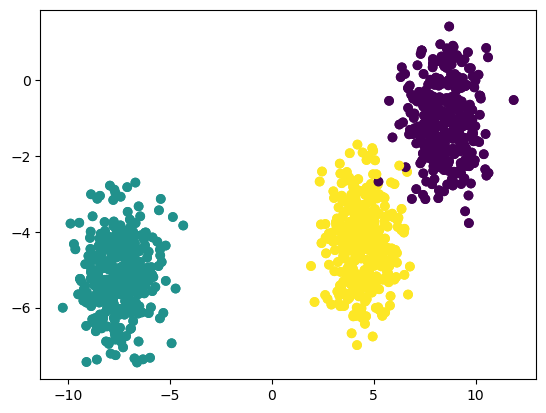

In [20]:
plt.scatter(X[:,0], X[:,1],c=y)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=55)

In [37]:
from sklearn.cluster import KMeans

In [47]:
# Elbow Method: To select the K-Value
wcss = []
for k in range(1,7):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    kmeans.inertia_ # has wcss value
    wcss.append(kmeans.inertia_)

In [49]:
wcss

[40666.64683830599,
 5101.211435615117,
 1551.6703482535163,
 1352.704802734575,
 1163.0091849545875,
 1061.6104583334584]

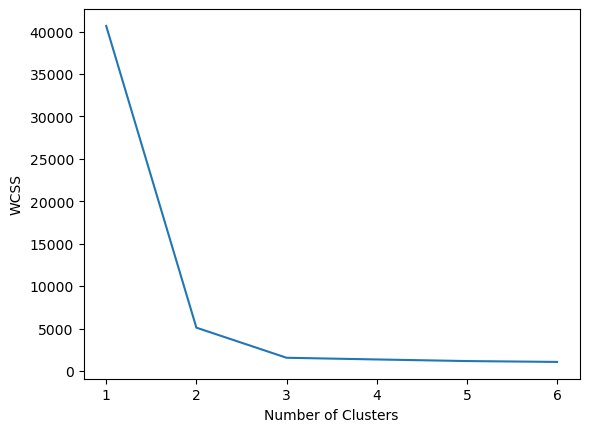

In [53]:
# plot the elbow curve
plt.plot(range(1,7), wcss)
plt.xticks(range(1,7))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [55]:
kmeans = KMeans(n_clusters=3, init="k-means++")

In [57]:
y_labels = kmeans.fit_predict(X_train)

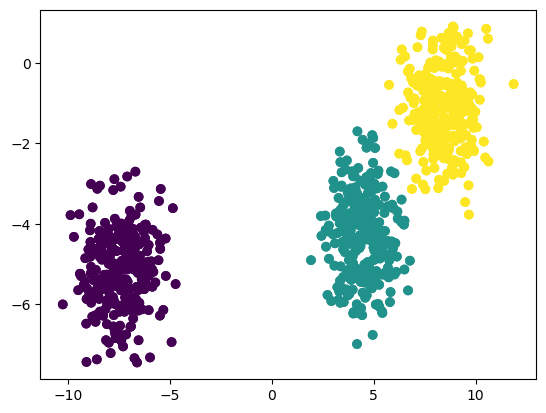

In [61]:
plt.scatter(X_train[:,0],X_train[:,1], c=y_labels)
plt.show()

In [63]:
# for huge datsets we use KNEE LOCATOR as it becomes seasier to find the K-value

In [65]:
!pip install kneed

In [67]:
# IT finds WCSS and K-value

In [69]:
from kneed import KneeLocator

In [71]:
k1 = KneeLocator(range(1,7),wcss,curve='convex',direction='decreasing')
k1.elbow

2

In [73]:
# Silhoutte score is a performance metrics(-1 to 1)

In [77]:
from sklearn.metrics import silhouette_score

In [85]:
silhouette_coefficients = []
for k in range(2,7): # range should be starting from 2
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [87]:
silhouette_coefficients

[0.7873107325480564,
 0.7218229677693457,
 0.5517516094836183,
 0.4961282762215862,
 0.4208831099085546]

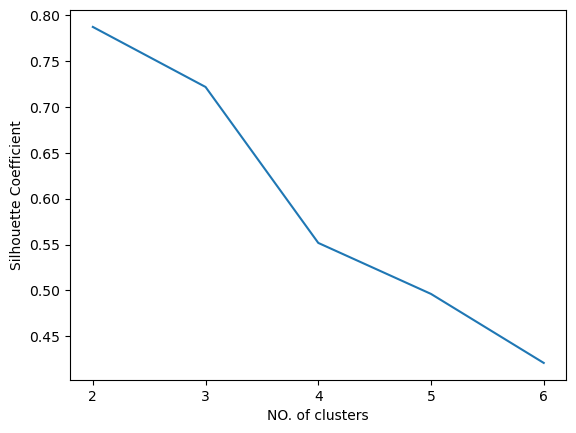

In [91]:
## plot silhouette score
plt.plot(range(2,7),silhouette_coefficients)
plt.xticks(range(2,7))
plt.xlabel("NO. of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()